In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [123]:
data=pd.read_csv("METABRIC_RNA_Mutation.csv")

In [124]:
data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [125]:
data.shape

(1904, 693)

In [126]:
data.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [127]:
data[data.duplicated()].value_counts()

Series([], dtype: int64)

In [128]:
data.isnull().sum().sort_values(ascending=False)[:15]

tumor_stage                       501
3-gene_classifier_subtype         204
primary_tumor_laterality          106
neoplasm_histologic_grade          72
cellularity                        54
mutation_count                     45
er_status_measured_by_ihc          30
type_of_breast_surgery             22
tumor_size                         20
cancer_type_detailed               15
oncotree_code                      15
tumor_other_histologic_subtype     15
death_from_cancer                   1
ar                                  0
bche                                0
dtype: int64

In [129]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data.head(14)

,Total_NaN,Percent_Nan
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
cancer_type_detailed,15,0.007878


In [130]:
data["tumor_stage"]=data["tumor_stage"].fillna(data["tumor_stage"].median())
data=data.drop("3-gene_classifier_subtype",axis=1)
data["primary_tumor_laterality"]=data["primary_tumor_laterality"].fillna(data["primary_tumor_laterality"].value_counts()[0])
data["neoplasm_histologic_grade"]=data["neoplasm_histologic_grade"].fillna(data["neoplasm_histologic_grade"].median())
data["cellularity"]=data["cellularity"].fillna(data["cellularity"].value_counts()[0])
data["mutation_count"]=data["mutation_count"].fillna(data["mutation_count"].mean())
data["er_status_measured_by_ihc"]=data["er_status_measured_by_ihc"].fillna(data["er_status_measured_by_ihc"].value_counts()[0])
data["type_of_breast_surgery"]=data["type_of_breast_surgery"].fillna(data["type_of_breast_surgery"].value_counts()[0])
data["tumor_size"]=data["tumor_size"].fillna(data["tumor_size"].mean())
data["cancer_type_detailed"]=data["cancer_type_detailed"].fillna(data["cancer_type_detailed"].value_counts()[0])
data["oncotree_code"]=data["oncotree_code"].fillna(data["oncotree_code"].value_counts()[0])
data["tumor_other_histologic_subtype"]=data["tumor_other_histologic_subtype"].fillna(data["tumor_other_histologic_subtype"].value_counts()[0])
data["death_from_cancer"]=data["death_from_cancer"].fillna(data["death_from_cancer"].value_counts()[0])

In [131]:
 data.isnull().sum().sort_values(ascending = False)

patient_id    0
bche          0
zfp36l1       0
ackr3         0
akr1c1        0
             ..
mapk9         0
mdc1          0
mlst8         0
mmp1          0
siah1_mut     0
Length: 692, dtype: int64

# Deleted Null Values

In [132]:
data.shape

(1904, 692)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 692 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(189)
memory usage: 10.1+ MB


In [134]:
data.describe()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,3921.982143,61.087054,0.207983,2.643908,2.438025,0.616597,2.002101,5.697687,4.033019,125.121324,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,2358.478332,12.978711,0.405971,1.228615,0.647842,0.486343,4.079993,4.010503,1.144492,76.334148,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


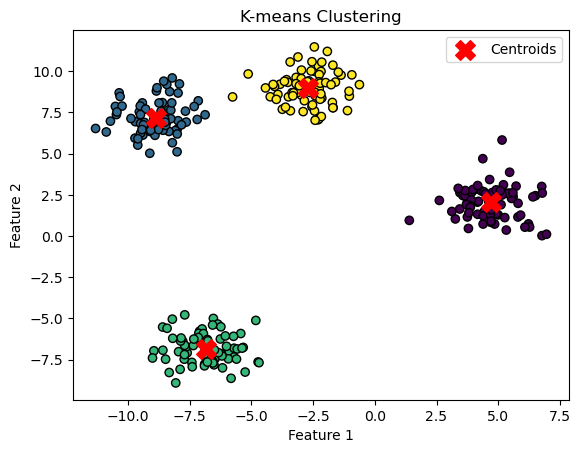

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


data, labels = make_blobs(n_samples=300, centers=4, random_state=42)


n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data)


cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Feature Importance:

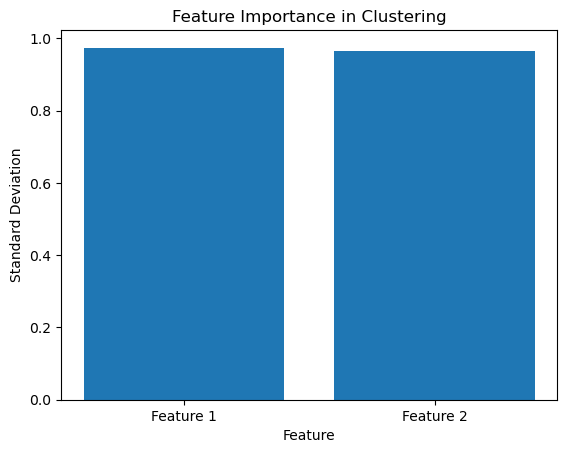

In [136]:
# Calculate feature importance
feature_importance = np.std(data - centroids[cluster_assignments], axis=0)

# Visualize feature importance
plt.bar(range(data.shape[1]), feature_importance)
plt.xticks(range(data.shape[1]), [f"Feature {i+1}" for i in range(data.shape[1])])
plt.title("Feature Importance in Clustering")
plt.xlabel("Feature")
plt.ylabel("Standard Deviation")
plt.show()


# Feature Values


In [137]:
for i in range(n_clusters):
    cluster_data = data[cluster_assignments == i]
    centroid_values = centroids[i]
    
    print(f"\nCluster {i + 1} Centroid Values:")
    for j, value in enumerate(centroid_values):
        print(f"Feature {j + 1}: {value}")

    print("\nCluster-specific Feature Ranges:")
    for j in range(data.shape[1]):
        feature_min = cluster_data[:, j].min()
        feature_max = cluster_data[:, j].max()
        print(f"Feature {j + 1}: [{feature_min}, {feature_max}]")



Cluster 1 Centroid Values:
Feature 1: 4.718204895066714
Feature 2: 2.041796756656691

Cluster-specific Feature Ranges:
Feature 1: [1.3986114961590288, 6.95453740290161]
Feature 2: [0.021081884418230112, 5.825901174595453]

Cluster 2 Centroid Values:
Feature 1: -8.873572184843912
Feature 2: 7.174583423660726

Cluster-specific Feature Ranges:
Feature 1: [-11.309972256763299, -6.873602623719621]
Feature 2: [5.021601750763118, 9.594215773303098]

Cluster 3 Centroid Values:
Feature 1: -6.832352051634657
Feature 2: -6.830457483002027

Cluster-specific Feature Ranges:
Feature 1: [-9.003522915461076, -4.689824257933598]
Feature 2: [-8.919341771036047, -4.787722317590486]

Cluster 4 Centroid Values:
Feature 1: -2.709811358661783
Feature 2: 8.971433356922457

Cluster-specific Feature Ranges:
Feature 1: [-5.759446948180773, -0.62301172184222]
Feature 2: [7.026717213597429, 11.477528240683608]


# Normalizing or Standardizing Features 

In [138]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max normalization
scaler_minmax = MinMaxScaler()
data_normalized = scaler_minmax.fit_transform(data)

# Standardization
scaler_standard = StandardScaler()
data_standardized = scaler_standard.fit_transform(data)


# Encoding Categorical Variables:

In [139]:
# Assuming 'data' is your NumPy array
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
# One-hot encoding
df_encoded = pd.get_dummies(df)

# Clustering

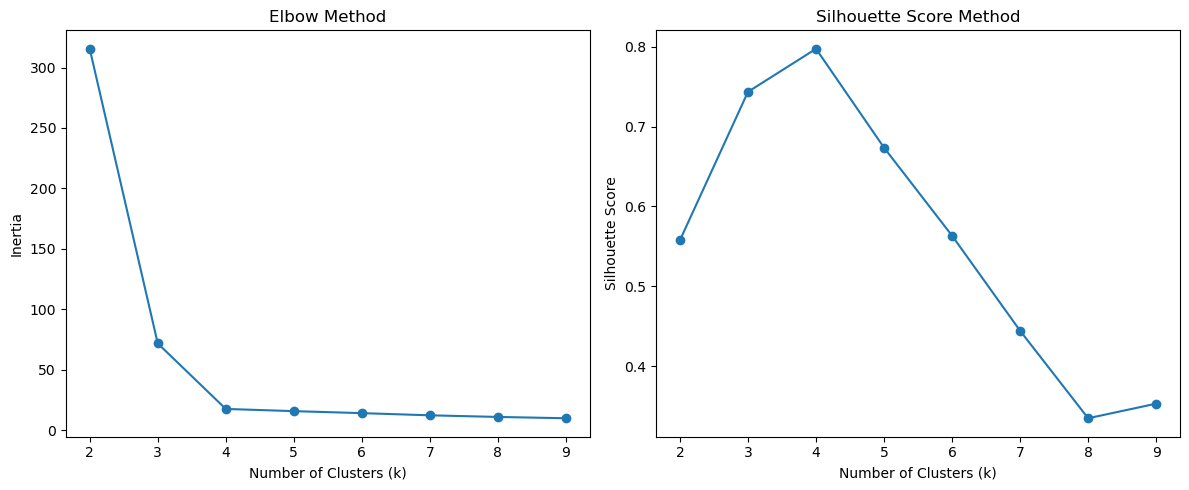

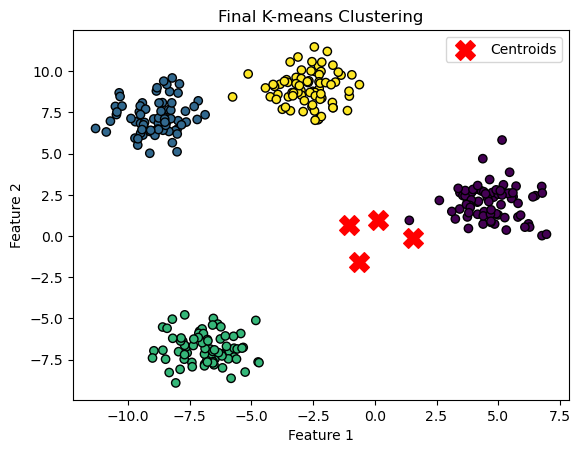

In [140]:
# Generate some example data
data, labels = make_blobs(n_samples=300, centers=4, random_state=42)

# Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
possible_k_values = range(2, 10)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_standardized)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_standardized, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the elbow method or silhouette score
optimal_k_elbow = 4  # Adjust based on the visual analysis of the elbow plot
optimal_k_silhouette = possible_k_values[np.argmax(silhouette_scores)]

# Apply K-means clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=optimal_k_elbow, random_state=42)
kmeans_final.fit(data_standardized)

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=kmeans_final.labels_, cmap='viridis', edgecolors='k')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Final K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Feature Importance Analysis

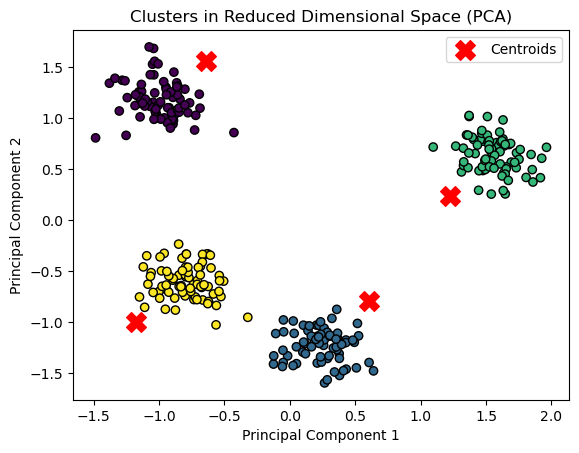

Explained Variance Ratio: [0.52896325 0.47103675]


In [141]:
data, labels = make_blobs(n_samples=300, centers=4, random_state=42)

# Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Apply K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(data_standardized)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# Visualize the clusters in the reduced-dimensional space
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_assignments, cmap='viridis', edgecolors='k')
plt.scatter(pca.inverse_transform(kmeans.cluster_centers_)[:, 0], pca.inverse_transform(kmeans.cluster_centers_)[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("Clusters in Reduced Dimensional Space (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Analyze the explained variance ratio of principal components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Feature-Cluster Associations

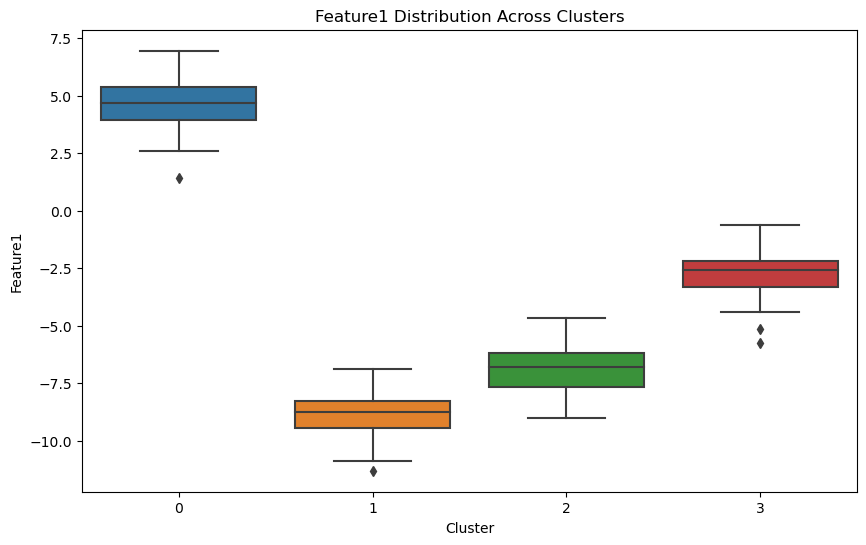


Summary for Feature1 across clusters:
Cluster          0          1          2          3
count    75.000000  74.000000  75.000000  76.000000
mean      4.718205  -8.873572  -6.832352  -2.709811
std       1.040241   0.918842   1.012282   0.947447
min       1.398611 -11.309972  -9.003523  -5.759447
25%       3.951334  -9.471356  -7.668304  -3.298761
50%       4.698088  -8.763860  -6.782631  -2.563116
75%       5.356656  -8.261384  -6.178748  -2.183319
max       6.954537  -6.873603  -4.689824  -0.623012



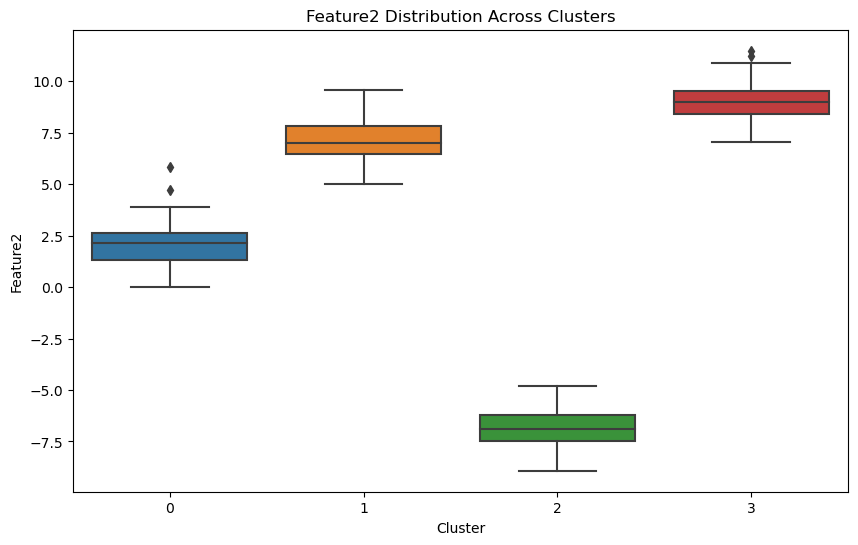


Summary for Feature2 across clusters:
Cluster          0          1          2          3
count    75.000000  74.000000  75.000000  76.000000
mean      2.041797   7.174583  -6.830457   8.971433
std       1.013849   0.995842   0.898325   0.978970
min       0.021082   5.021602  -8.919342   7.026717
25%       1.300050   6.460209  -7.475583   8.424615
50%       2.159624   6.984754  -6.912804   8.963806
75%       2.644034   7.822031  -6.231101   9.534877
max       5.825901   9.594216  -4.787722  11.477528



In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate some example data
data, labels = make_blobs(n_samples=300, centers=4, random_state=42)

# Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Apply K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(data_standardized)

# Create a DataFrame with the original data and cluster assignments
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df['Cluster'] = cluster_assignments

# Identify important features (for example, let's assume both features are important)
important_features = ['Feature1', 'Feature2']

# Create a summary or report for feature-cluster associations
for feature in important_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} Distribution Across Clusters')
    plt.show()

    summary_table = df.groupby('Cluster')[feature].describe().transpose()
    print(f"\nSummary for {feature} across clusters:\n{summary_table}\n")


# Evaluation and Documentation

Silhouette Score: 0.7974739889632732
Davies-Bouldin Index: 0.2811066469065264

Cluster Summary:
   Cluster  Number of Data Points index_x        0_x        1_x        2_x  \
0        0                     75   count  75.000000  74.000000  75.000000   
1        1                     74    mean   4.718205  -8.873572  -6.832352   
2        2                     75     std   1.040241   0.918842   1.012282   
3        3                     76     min   1.398611 -11.309972  -9.003523   

         3_x index_y        0_y        1_y        2_y        3_y  
0  76.000000   count  75.000000  74.000000  75.000000  76.000000  
1  -2.709811    mean   2.041797   7.174583  -6.830457   8.971433  
2   0.947447     std   1.013849   0.995842   0.898325   0.978970  
3  -5.759447     min   0.021082   5.021602  -8.919342   7.026717  


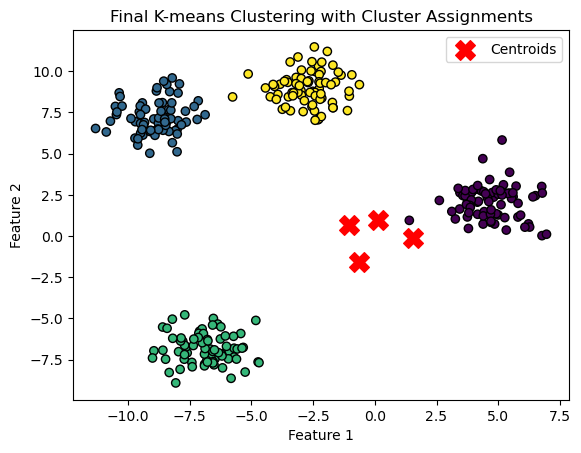

In [143]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assume 'data' is your original data, 'cluster_assignments' is the cluster assignments, and 'important_features' is a list of feature names

# Evaluate clustering quality
silhouette_avg = silhouette_score(data_standardized, cluster_assignments)
db_index = davies_bouldin_score(data_standardized, cluster_assignments)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")

# Create a summary or report for feature-cluster associations
cluster_summary = pd.DataFrame()
cluster_summary['Cluster'] = range(n_clusters)
cluster_summary['Number of Data Points'] = df['Cluster'].value_counts().sort_index().values

# Add descriptive statistics for important features in each cluster
for feature in important_features:
    summary_stats = df.groupby('Cluster')[feature].describe().transpose()
    summary_stats = summary_stats.reset_index()  # Reset the index
    summary_stats.index = summary_stats.index.astype('int64')  # Convert the index to int64
    cluster_summary = pd.merge(cluster_summary, summary_stats, left_on='Cluster', right_index=True)

# Display the cluster summary
print("\nCluster Summary:")
print(cluster_summary)


# Visualize the cluster assignments in the original feature space
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignments, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Final K-means Clustering with Cluster Assignments")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
